In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import visualization as vs

%load_ext autoreload
%autoreload 2

# Gender aspect of meetupers

In [2]:
user_meetup_M = pd.read_csv('results/user-meetup-info-M.csv')
user_meetup_F = pd.read_csv('results/user-meetup-info-F.csv')

# user_meetup_AM = pd.read_csv('results/user-meetup-info-M_AM.csv')
# user_meetup_AF = pd.read_csv('results/user-meetup-info-F_AF.csv')

user_meetup_MF = pd.read_csv('results/user-meetup-info-M_F.csv')

In [56]:
shared_egolist = list(set(user_meetup_M['userid_x'].tolist()) & set(user_meetup_F['userid_x'].tolist()) & set(user_meetup_MF['userid_x'].tolist())) 

In [59]:
len(shared_egolist)

6408

In [61]:
user_stats_M = user_meetup_M[user_meetup_M['userid_x'].isin(shared_egolist)]
user_stats_F = user_meetup_F[user_meetup_F['userid_x'].isin(shared_egolist)]
user_stats_MF = user_meetup_MF[user_meetup_MF['userid_x'].isin(shared_egolist)] 

In [62]:
print(len(set(user_stats_M['userid_x'].tolist())), 
     len(set(user_stats_F['userid_x'].tolist())),
     len(set(user_stats_MF['userid_x'].tolist())))

6408 6408 6408


In [63]:
print(len(set(user_stats_M['userid_y'].tolist())), 
     len(set(user_stats_F['userid_y'].tolist())),
     len(set(user_stats_MF['userid_y'].tolist())))

5693 1434 7127


In our dataset, for all the shared users, there are *5693* male meetupers and *1434* female meetupers, totally, *7127* meetupers

## Compare entropy and predictability with only male meetupers and female meetupers

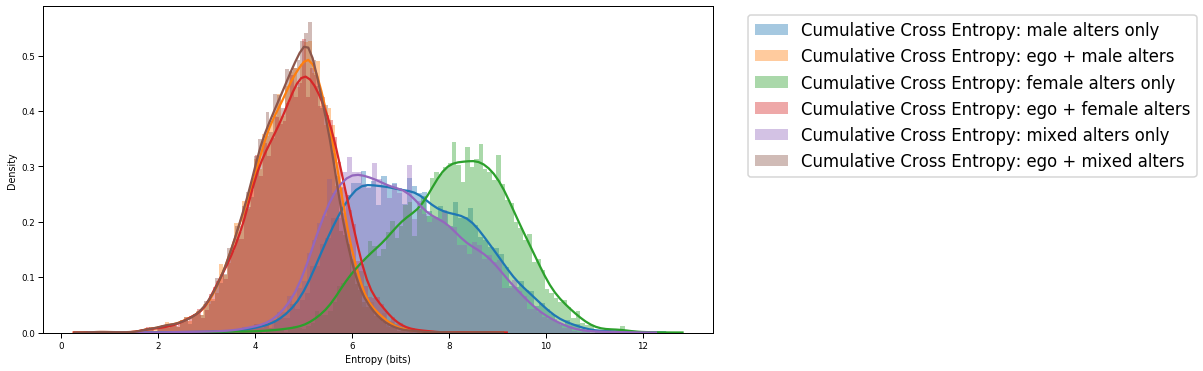

In [151]:
user_stats = pd.concat([user_stats_M, user_stats_F])
vs.hist_entropy_gender(user_stats, user_stats_MF)

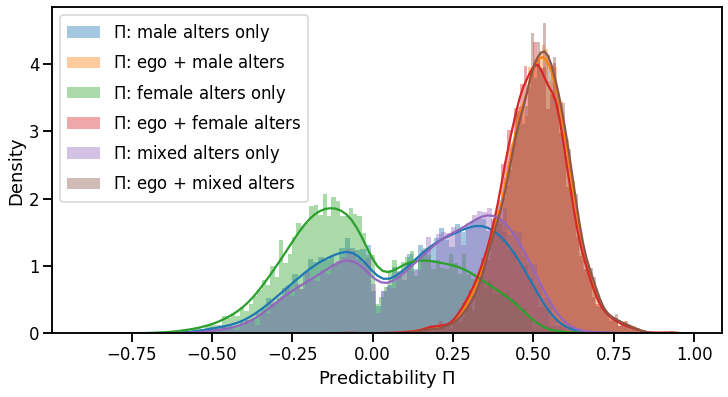

In [152]:
vs.hist_pred_gender(user_stats, user_stats_MF)

## How many male or female meetupers needed to predict us?

There are total **6408** users who have **5693** distinct male meetupers (user_stats_M) and **1434** distinct female meetupers (user_stats_F), totally, distinct **7127** meetupers (user_stats_MF).

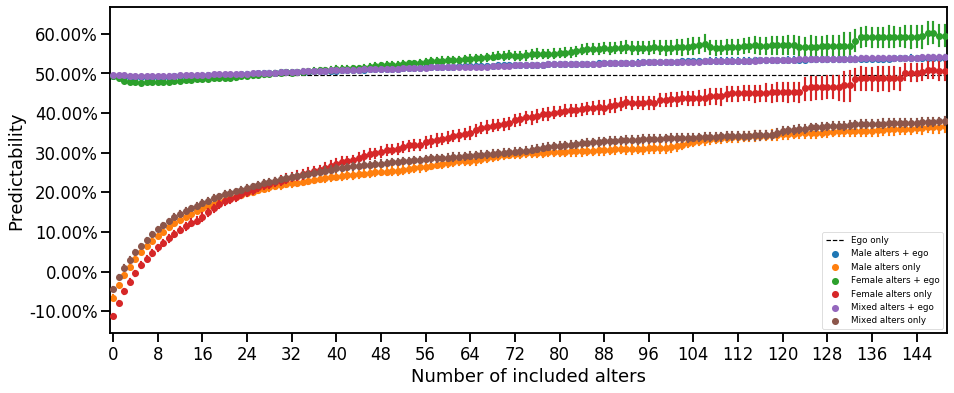

In [153]:
vs.num_point_plot_gender(user_stats, name='predictability', user_stats_mixed=user_stats_MF, mode='paper', threshold=150)

### Filter our dataset with more than 100 meetupers required

In [154]:
user_stats_L100 = user_stats[user_stats['n_meetupers']>100]
user_stats_L100_mixed = user_stats_MF[user_stats_MF['n_meetupers']>100]

In [155]:
len(set(user_stats_L100[user_stats_L100['Gender_Guesser_y']=='M']['userid_x'].tolist()))

849

In [156]:
len(set(user_stats_L100[user_stats_L100['Gender_Guesser_y']=='F']['userid_x'].tolist()))

42

In [157]:
len(set(user_stats_L100_mixed['userid_x'].tolist()))

1113

Therefore, we choose the **42** users appears in all of these datasets.

In [158]:
shared_egolist_L100 = list(set(user_stats_L100[user_stats_L100['Gender_Guesser_y']=='M']['userid_x'].tolist()) & 
                           set(user_stats_L100[user_stats_L100['Gender_Guesser_y']=='F']['userid_x'].tolist()) & 
                           set(user_stats_L100_mixed['userid_x'].tolist())) 

In [159]:
len(shared_egolist_L100) 

42

In [160]:
user_stats_L100 = user_stats_L100[user_stats_L100['userid_x'].isin(shared_egolist_L100)]
user_stats_L100_mixed = user_stats_L100_mixed[user_stats_L100_mixed['userid_x'].isin(shared_egolist_L100)]

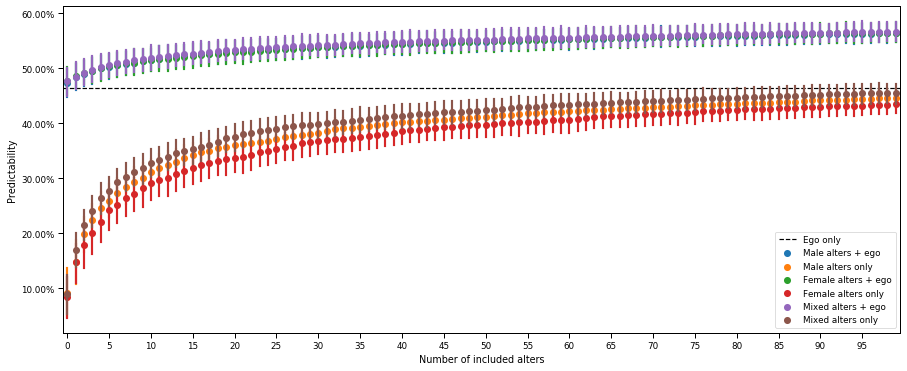

In [161]:
vs.num_point_plot_gender(user_stats_L100, name='predictability', mode='paper', 
                         user_stats_mixed=user_stats_L100_mixed,threshold=100)